In [1]:
# plot imbalanced classification problem
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

1. Problems With Imbalance Classification.

Imbalanced classification is a problem to the existing machine learning algorithms as these algorightms were not designed with imbalanced classes in mind. So the models that are trained in a  traditional machine learning algorithm will have poor performance , especially with the minority class, usually minority class would be the important class (Fraud Detection, Cancer Detection). And in these cases incorrectly predicting could have sever implications.



2. Intuition for Imbalanced Data.

Here we will generate a synthetic imbalanced dataset.

In [4]:
X, y = make_classification(n_samples=10000, n_features=5, n_redundant=0, n_clusters_per_class=1, weights=[0.95, 0.05], flip_y=0)

counter = Counter(y)
print(counter)

Counter({0: 9500, 1: 500})


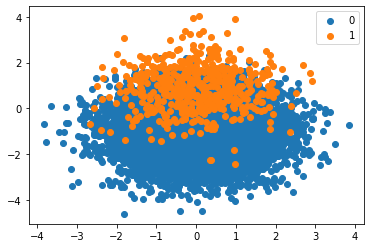

In [5]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

3. Evaluate Imbalanced classification

Although prediction accuracy is the most common metric used in classification problems, when it comes to imbalanced dataset, Just Accuracy would not justify the true performance of the model.

The reason for this is the if majority class has 98 % of data and minority class has only 2 %  of data, Even if model always predicts majority class all the time, The Accuracy would still be 98 % and the model doesn't not need any understanding of data do achieve this.

Instead we should look for alternate metrics like Precision and Recall score that allow the performance to be considered focussing on the positive class.

* Precision calculates the ratio of the number of positive cases correctly 
predicted by the total number of positive classes, maximizing precision would reduce the False Positives.

    Precision = TruePositive/(TruePositive + FalsePositive)

* Recall Predicts the ratio of the number of positive cases correctlt predicted by the total number of case that could have been predicted, maximizing the recall would reduce teh false negatives.
    Recall = TruePositive/(TruePositive + FalseNegative)

* The performance of a model can be summarized using a single measure which combines both precision and recall , called the F1-Score. Maximizing the F1-Score would maximize both precision and recall.
    F-measure = (2 * Recall * Precision)/(Precision + Recall)



In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score, roc_auc_score

In [13]:
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(f"Accuracy : {model.score(X, y)}")
print(f"Precision : {precision_score(y, y_pred)}")
print(f"Recall  : {recall_score(y, y_pred)}")
print(f"F1 Score : {f1_score(y, y_pred)}")
print(f"F Beta :  {fbeta_score(y, y_pred,beta=10)}")
print(f"Roc Auc Score : {roc_auc_score(y, y_pred)}")

Accuracy : 0.9614
Precision : 0.7544642857142857
Recall  : 0.338
F1 Score : 0.46685082872928185
F Beta :  0.3398574386747373
Roc Auc Score : 0.6661052631578948


Here we can see that model has 96 % accuracy, but very low f1 score 

4. Undersampling the majority class


A simple approach to handling an imbalanced dataset is to sample the the training dataset to have more balanced class distribution.

This can be achieved by deleting samples from the training dataset also known as "Undersampling". The one downside with this approach is the we might loose some important information while deleting the records.

In [15]:
# example of undersampling the majority class
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler, 
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99, 0.01], flip_y=0)
# summarize class distribution
print(Counter(y))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy=0.5) #we are undersampling the majority class at a ratio of 50 % higher than minority class
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_under))

Counter({0: 9900, 1: 100})
Counter({0: 200, 1: 100})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [16]:
model = LogisticRegression()
model.fit(X_under, y_under)
y_pred = model.predict(X_under)

print(f"Accuracy : {model.score(X_under, y_under)}")
print(f"Precision : {precision_score(y_under, y_pred)}")
print(f"Recall  : {recall_score(y_under, y_pred)}")
print(f"F1 Score : {f1_score(y_under, y_pred)}")
print(f"F Beta :  {fbeta_score(y_under, y_pred,beta=10)}")
print(f"Roc Auc Score : {roc_auc_score(y_under, y_pred)}")

Accuracy : 0.9466666666666667
Precision : 0.8962264150943396
Recall  : 0.95
F1 Score : 0.9223300970873787
F Beta :  0.9494359786265585
Roc Auc Score : 0.9474999999999999


In [19]:
y_pred = model.predict(X)
print(f"Accuracy : {model.score(X, y)}")
print(f"Precision : {precision_score(y, y_pred)}")
print(f"Recall  : {recall_score(y, y_pred)}")
print(f"F1 Score : {f1_score(y, y_pred)}")
print(f"F Beta :  {fbeta_score(y, y_pred,beta=10)}")
print(f"Roc Auc Score : {roc_auc_score(y, y_pred)}")

Accuracy : 0.965
Precision : 0.2159090909090909
Recall  : 0.95
F1 Score : 0.35185185185185186
F Beta :  0.9190613026819925
Roc Auc Score : 0.9575757575757575


5. Oversampling the Minority Class.

An alternative to deleting the data of majority class is to add new examples to the minority class.

This can be achieved by simply duplicating the data of the minority class.These new examples would not add any new information to the model, instead the new exaples can added to the minority class by synthesizing the data from existing minority class.These new examples would be close to the existing data but different in small but random way.



In [22]:
from imblearn.over_sampling import SMOTE

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99, 0.01], flip_y=0)
# summarize class distribution
print(Counter(y))
# define oversample strategy

oversample = SMOTE(sampling_strategy=0.5)

X_over, y_over = oversample.fit_resample(X, y)
print(Counter(y_over))

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 4950})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [23]:
model = LogisticRegression()
model.fit(X_over, y_over)
y_pred = model.predict(X_over)

print(f"Accuracy : {model.score(X_over, y_over)}")
print(f"Precision : {precision_score(y_over, y_pred)}")
print(f"Recall  : {recall_score(y_over, y_pred)}")
print(f"F1 Score : {f1_score(y_over, y_pred)}")
print(f"F Beta :  {fbeta_score(y_over, y_pred,beta=10)}")
print(f"Roc Auc Score : {roc_auc_score(y_over, y_pred)}")

Accuracy : 0.8818855218855219
Precision : 0.8084942084942085
Recall  : 0.8460606060606061
F1 Score : 0.8268509378084896
F Beta :  0.8456715582390341
Roc Auc Score : 0.872929292929293


In [24]:
oversample_100 = SMOTE(sampling_strategy=1)

X_over_100, y_over_100 = oversample_100.fit_resample(X, y)

model = LogisticRegression()
model.fit(X_over_100, y_over_100)
y_pred = model.predict(X_over_100)

print(f"Accuracy : {model.score(X_over_100, y_over_100)}")
print(f"Precision : {precision_score(y_over_100, y_pred)}")
print(f"Recall  : {recall_score(y_over_100, y_pred)}")
print(f"F1 Score : {f1_score(y_over_100, y_pred)}")
print(f"F Beta :  {fbeta_score(y_over_100, y_pred,beta=10)}")
print(f"Roc Auc Score : {roc_auc_score(y_over_100, y_pred)}")

Accuracy : 0.9061616161616162
Precision : 0.8711463909913236
Recall  : 0.9533333333333334
F1 Score : 0.9103887334812386
F Beta :  0.9524436619859038
Roc Auc Score : 0.9061616161616162


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


6. Combine Data Undersampling and Oversampling

Data undersampling will delete examples from majority class, and undersampling will sythesize new samples to the minority class.These two approaches can be comnined to create a single dataset.

Given that there are so many different data sampling techniques to choose from, it can be confusing as to which methods to combine. Thankfully, there are common combinations that have been shown to work well in practice; some examples include:

* Random Undersampling with SMOTE oversampling.
* Tomek Links Undersampling with SMOTE oversampling.
* Edited Nearest Neighbors Undersampling with SMOTE oversampling.

In [33]:
from imblearn.combine import SMOTEENN
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99, 0.01], flip_y=0)
# summarize class distribution
print(Counter(y))
# define sampling strategy
sample = SMOTEENN(sampling_strategy=0.5)
# fit and apply the transform
X_over_een, y_over_een = sample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over_een))

model = LogisticRegression()
model.fit(X_over_een, y_over_een)
y_pred = model.predict(X_over_een)

print(f"Accuracy : {model.score(X_over_een, y_over_een)}")
print(f"Precision : {precision_score(y_over_een, y_pred)}")
print(f"Recall  : {recall_score(y_over_een, y_pred)}")
print(f"F1 Score : {f1_score(y_over_een, y_pred)}")
print(f"F Beta :  {fbeta_score(y_over_een, y_pred,beta=10)}")
print(f"Roc Auc Score : {roc_auc_score(y_over_een, y_pred)}")


print("-------------------------------------------------------")


y_pred = model.predict(X)

print(f"Accuracy : {model.score(X, y)}")
print(f"Precision : {precision_score(y, y_pred)}")
print(f"Recall  : {recall_score(y, y_pred)}")
print(f"F1 Score : {f1_score(y, y_pred)}")
print(f"F Beta :  {fbeta_score(y, y_pred,beta=10)}")
print(f"Roc Auc Score : {roc_auc_score(y, y_pred)}")

Counter({0: 9900, 1: 100})
Counter({0: 9256, 1: 4356})
Accuracy : 0.9382897443432265
Precision : 0.8808492201039861
Recall  : 0.933425160697888
F1 Score : 0.9063753901025412
F Beta :  0.9328738619223289
Roc Auc Score : 0.9370021222676994
-------------------------------------------------------
Accuracy : 0.8899
Precision : 0.07620660457239628
Recall  : 0.9
F1 Score : 0.14051522248243561
F Beta :  0.8129863160719076
Roc Auc Score : 0.8948989898989899


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [35]:
from imblearn.combine import SMOTETomek

smotetomek = SMOTETomek(sampling_strategy=0.5)

X_over_tomek, y_over_tomek = smotetomek.fit_resample(X,y)

print(Counter(y_over_tomek))

model = LogisticRegression()
model.fit(X_over_tomek, y_over_tomek)
y_pred = model.predict(X_over_tomek)

print(f"Accuracy : {model.score(X_over_tomek, y_over_tomek)}")
print(f"Precision : {precision_score(y_over_tomek, y_pred)}")
print(f"Recall  : {recall_score(y_over_tomek, y_pred)}")
print(f"F1 Score : {f1_score(y_over_tomek, y_pred)}")
print(f"F Beta :  {fbeta_score(y_over_tomek, y_pred,beta=10)}")
print(f"Roc Auc Score : {roc_auc_score(y_over_tomek, y_pred)}")

print("----------------------------------------------------")

y_pred = model.predict(X)

print(f"Accuracy : {model.score(X, y)}")
print(f"Precision : {precision_score(y, y_pred)}")
print(f"Recall  : {recall_score(y, y_pred)}")
print(f"F1 Score : {f1_score(y, y_pred)}")
print(f"F Beta :  {fbeta_score(y, y_pred,beta=10)}")
print(f"Roc Auc Score : {roc_auc_score(y, y_pred)}")

Counter({0: 9779, 1: 4829})
Accuracy : 0.9054627601314348
Precision : 0.8293847917462743
Recall  : 0.8989438807206461
F1 Score : 0.8627645831263043
F Beta :  0.8981980357852558
Roc Auc Score : 0.9038128750162184
----------------------------------------------------
Accuracy : 0.9002
Precision : 0.08271375464684015
Recall  : 0.89
F1 Score : 0.15136054421768708
F Beta :  0.8115745756590828
Roc Auc Score : 0.8951515151515151


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


7. Cost Sensitive Algorithms

Here we will have a heuristic way to update the error predicted by the model based the class weights provided to the model. In general this would be inversely proportional to the numbe rof samples in the training data. If the training classes are in the ratio of 99:1 then the class weights would be in the ratio of 1: 99



In [38]:
# example of cost sensitive logistic regression for imbalanced classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

X, y  = make_classification(n_samples=10000, n_features=5, n_clusters_per_class=1, weights=[0.99], flip_y=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

model = LogisticRegression(class_weight='balanced')

model.fit(X_train, y_train)

y_pred = model.predict(X_train)

print(f"Accuracy : {model.score(X_train, y_train)}")
print(f"Precision : {precision_score(y_train, y_pred)}")
print(f"Recall  : {recall_score(y_train, y_pred)}")
print(f"F1 Score : {f1_score(y_train, y_pred)}")
print(f"F Beta :  {fbeta_score(y_train, y_pred,beta=10)}")
print(f"Roc Auc Score : {roc_auc_score(y_train, y_pred)}")


print("--------------------------------------------------------")
y_pred = model.predict(X_test)

print(f"Accuracy : {model.score(X_test, y_test)}")
print(f"Precision : {precision_score(y_test, y_pred)}")
print(f"Recall  : {recall_score(y_test, y_pred)}")
print(f"F1 Score : {f1_score(y_test, y_pred)}")
print(f"F Beta :  {fbeta_score(y_test, y_pred,beta=10)}")
print(f"Roc Auc Score : {roc_auc_score(y_test, y_pred)}")

Accuracy : 0.96425
Precision : 0.21703296703296704
Recall  : 0.9875
F1 Score : 0.3558558558558559
F Beta :  0.9539693926351028
Roc Auc Score : 0.9757575757575758
--------------------------------------------------------
Accuracy : 0.9685
Precision : 0.24096385542168675
Recall  : 1.0
F1 Score : 0.38834951456310685
F Beta :  0.9697551608257321
Roc Auc Score : 0.984090909090909
